In [3]:
!pip install thefuzz

   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.6 MB 656.4 kB/s eta 0:00:03
   -- ------------------------------------- 0.1/1.6 MB 871.5 kB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.6 MB 1.3 MB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.6 MB 1.4 MB/s eta 0:00:01
   ------------ --------------------------- 0.5/1.6 MB 1.9 MB/s eta 0:00:01
   --------------- ------------------------ 0.6/1.6 MB 2.1 MB/s eta 0:00:01
   -------------------- ------------------- 0.8/1.6 MB 2.4 MB/s eta 0:00:01
   ----------------------- ---------------- 1.0/1.6 MB 2.4 MB/s eta 0:00:01
   ---------------------------- ----------- 1.1/1.6 MB 2.7 MB/s eta 0:00:01
   ------------------------------ --------- 1.2/1.6 MB 2.5 MB/s eta 0:00:01
   ---------------------------------------  1.6/1.6 MB 3.0 MB/s eta 0:00:01
   -------------------


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from thefuzz import fuzz
import numpy as np


- define the input: a string containing the full paper
- choose a standard commonly used NLP library (https://www.stxnext.com/blog/top-python-nlp-libraries/) nltk // textblob
- add as many features as possible to each word of the dictionary
- look for the features that correlates the most with the 'count' <---- put any machine learning here 
- use those features to guess the difficulty on the article
- for the top N most difficult words you match the meaning with the API

In [5]:
dict_df = pd.read_csv("unigram_freq.csv")

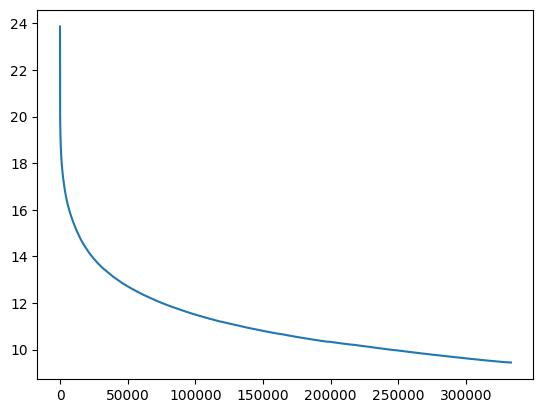

In [6]:
plt.plot(np.log(dict_df['count']))

In [24]:
def count_len(x):
    if type(x)!=str:
        return -1
    else:
        return int(len(x))
dict_df['word_lenghth'] = dict_df['word'].apply( lambda x: count_len(x))

In [25]:
dict_df.head()

,word,count,word_lenghth
0,the,23135851162,3
1,of,13151942776,2
2,and,12997637966,3
3,to,12136980858,2
4,a,9081174698,1


In [28]:
sum(dict_df['word_lenghth']==-1)

2

In [35]:
dict_df[['word_lenghth','count']].corr()

,word_lenghth,count
word_lenghth,1.000000,-0.023053
count,-0.023053,1.000000


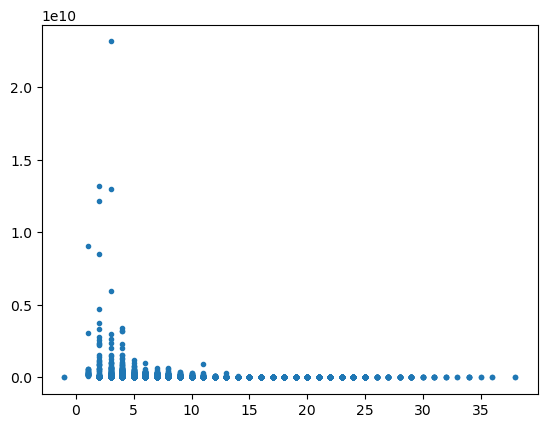

In [39]:
plt.plot(dict_df['word_lenghth'].values,dict_df['count'].values,'.')

In [32]:
(dict_df.groupby('word_lenghth').count()/len(dict_df)).head()

,word,count
word_lenghth,,
-1,0.000000,0.000006
1,0.000078,0.000078
2,0.002028,0.002028
3,0.038928,0.038928
4,0.093417,0.093417


In [40]:
import os

In [41]:
os.getcwd()

'C:\\python\\repo'